#  DECISION TREE

<h2>SET 1</h1>

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [0]:
link='https://drive.google.com/open?id=17UdaINmxF7AIju_Z947-eLbMSk7LQH55'
fluff, id = link.split('=')
print (id)




17UdaINmxF7AIju_Z947-eLbMSk7LQH55


In [0]:
import pandas
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('preprocessed_data.csv')  
data = pandas.read_csv('preprocessed_data.csv')
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>1.3 Make Data Model Ready: encoding eassay</h2>

In [0]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(min_df=10,max_features=5000)


vectorizer1.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer1.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer1.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer1.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
print(X_cv_clean_cat_ohe.shape, y_cv.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_sub_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_cat_sub_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_cat_sub_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_cat_sub_ohe.shape, y_train.shape)
print(X_cv_clean_cat_sub_ohe.shape, y_cv.shape)
print(X_test_clean_cat_sub_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)



After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_number_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_number_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_number_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_number_norm.shape, y_train.shape)
print(X_cv_number_norm.shape, y_cv.shape)
print(X_test_number_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
v=np.array(X_train_number_norm)
o=np.array(X_train_price_norm)
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_cat_ohe,X_train_clean_cat_sub_ohe,v,o)).tocsr()
v=np.array(X_cv_number_norm)
o=np.array(X_cv_price_norm)
X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_clean_cat_ohe,X_cv_clean_cat_sub_ohe,v,o)).tocsr()
v=np.array(X_test_number_norm)
o=np.array(X_test_price_norm)
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_cat_ohe,X_test_clean_cat_sub_ohe,v,o)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)


Final Data matrix
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)


<h2>1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

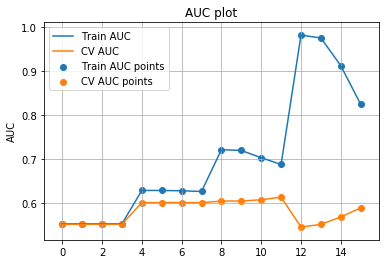

The parameters combination that would give best accuracy is : 
{'max_depth': 10, 'min_samples_split': 500}
The best accuracy achieved after parameter tuning via grid search is :  0.6128923526935316


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.461332,0.003661,0.015705,0.000407,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.554982,0.544362,0.553675,0.551006,0.004728,11,0.550052,0.554735,0.551553,0.552113,0.001952
1,0.459120,0.003012,0.015257,0.000089,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.554982,0.544362,0.553675,0.551006,0.004728,11,0.550052,0.554735,0.551553,0.552113,0.001952
2,0.457940,0.001640,0.015248,0.000026,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.554982,0.544362,0.553675,0.551006,0.004728,11,0.550052,0.554735,0.551553,0.552113,0.001952
3,0.462383,0.007271,0.015901,0.000862,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.554982,0.544362,0.553675,0.551006,0.004728,11,0.550052,0.554735,0.551553,0.552113,0.001952
4,2.122383,0.017143,0.016133,0.000162,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.605079,0.592926,0.603520,0.600508,0.005399,7,0.623595,0.635481,0.625421,0.628166,0.005226


In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import math


alpha =DecisionTreeClassifier(random_state=0,class_weight="balanced")
parameters = {'max_depth': [1, 5, 10, 50],'min_samples_split':[5,10,100,500]}
clf1 = GridSearchCV(alpha, parameters,cv=3, scoring='roc_auc',return_train_score=True)
best_alpha1=clf1.fit(X_tr_tfidf, y_train)

results1 = pd.DataFrame.from_dict(clf1.cv_results_)
#print(results)
#results1 = results1.sort_values(['param_max_depth'])

train_auc_set2= results1['mean_train_score']
train_auc_std_set2= results1['std_train_score']
cv_auc_set2 = results1['mean_test_score'] 
cv_auc_std_set2= results1['std_test_score']
#K2 =  results1['param_max_depth']
Y=[] 
for i in range(16):
    Y.append(i)

plt.plot(Y,train_auc_set2,label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(Y, cv_auc_set2, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(Y, train_auc_set2, label='Train AUC points')
plt.scatter(Y, cv_auc_set2, label='CV AUC points')


plt.legend()
#plt.xlabel("Max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC plot")
plt.grid()
plt.show()

results1.head()
print('The parameters combination that would give best accuracy is : ')
print(clf1.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', clf1.best_score_)
results1.head()

HEAT MAP-TRAIN DATA


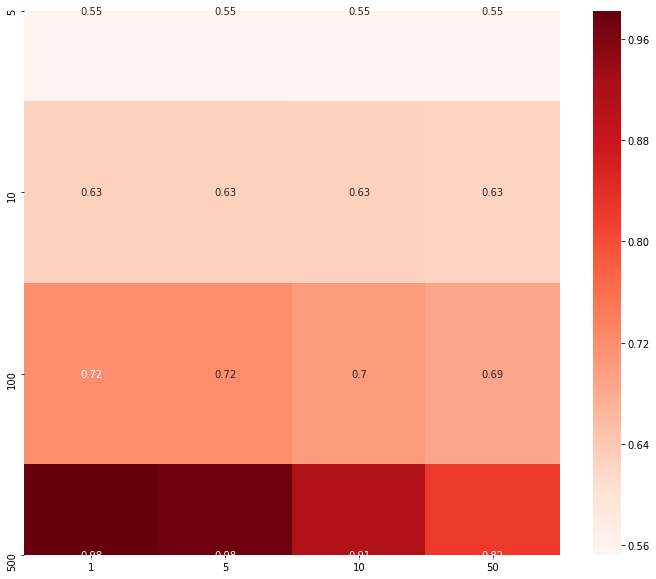

HEAT MAP-CV DATA


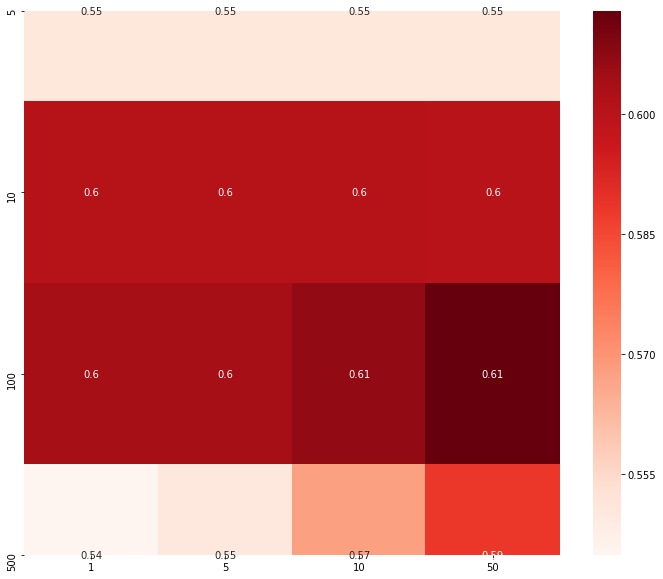

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,10))
print("HEAT MAP-TRAIN DATA")
data_tr={'1':[train_auc_set2.iloc[0],train_auc_set2.iloc[4],train_auc_set2.iloc[8],train_auc_set2.iloc[12]],'5':[train_auc_set2.iloc[1],train_auc_set2.iloc[5],train_auc_set2.iloc[9],train_auc_set2.iloc[13]],'10':[train_auc_set2.iloc[2],train_auc_set2.iloc[6],train_auc_set2.iloc[10],train_auc_set2.iloc[14]],'50':[train_auc_set2.iloc[3],train_auc_set2.iloc[7],train_auc_set2.iloc[11],train_auc_set2.iloc[15]]}
df_tr=pd.DataFrame(data_tr,index=[5,10,100,500])
sns.heatmap(df_tr, annot=True, cmap=plt.cm.Reds)
plt.show()

plt.figure(figsize=(12,10))
print("HEAT MAP-CV DATA")
data_test={'1':[cv_auc_set2.iloc[0],cv_auc_set2.iloc[4],cv_auc_set2.iloc[8],cv_auc_set2.iloc[12]],'5':[cv_auc_set2.iloc[1],cv_auc_set2.iloc[5],cv_auc_set2.iloc[9],cv_auc_set2.iloc[13]],'10':[cv_auc_set2.iloc[2],cv_auc_set2.iloc[6],cv_auc_set2.iloc[10],cv_auc_set2.iloc[14]],'50':[cv_auc_set2.iloc[3],cv_auc_set2.iloc[7],cv_auc_set2.iloc[11],cv_auc_set2.iloc[15]]}
df_test=pd.DataFrame(data_test,index=[5,10,100,500])

sns.heatmap(df_test, annot=True, cmap=plt.cm.Reds)
plt.show()

ROC WIth Threshold 0.5


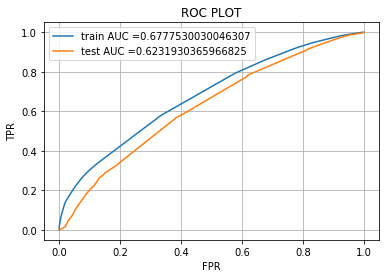

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

#best_alpha=best_alpha.best_estimator_.get_params()['alpha']
clf =DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight="balanced")
clf.fit(X_tr_tfidf,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs


y_train_pred=(clf.predict_proba(X_tr_tfidf)[:,1])
y_test_pred=(clf.predict_proba(X_te_tfidf)[:,1])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
plt.grid()
plt.show()


Confuion matrix without setting best threshold

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score



clf =DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_split=500,class_weight="balanced")
clf.fit(X_tr_tfidf,y_train)
 
y_predicted = clf.predict(X_te_tfidf)
f1_score(y_test, y_predicted)
cm = confusion_matrix(y_test, y_predicted)
tn, fp, fn, tp = cm.ravel()
test_TPR=tp/(fn+tp)
test_FPR=fp/(tn+fp)
print("test TPR",test_TPR)
print("test FPR",test_FPR)

test TPR 0.5666328898767692
test FPR 0.37992306283202054


ROC after finding best Threshold


In [0]:
#source:https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print ('Train Accuracy:',acc_train)
    print ('Train AUC:', auc_train)
    print ('Train Confusion Matrix:')
    print (cm_train)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    #curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print ('Test Accuracy:',acc_test)
    print ('Test AUC:', auc_test)
    print ('Test Confusion Matrix:')
    print (cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])
    tn, fp, fn, tp = cm_test.ravel()
    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    #curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()
    test_TPR=tp/(fn+tp)
    test_FPR=fp/(tn+fp)
    print("test TPR",test_TPR)
    print("test FPR",test_FPR)
    return best_threshold

Train Accuracy: 0.5895883036642809
Train AUC: 0.6223197950484186
Train Confusion Matrix:
[[ 4970  2456]
 [17671 23944]]
Test Accuracy: 0.573310773327416
Test AUC: 0.5918441551859681
Test Confusion Matrix:
[[ 3376  2083]
 [13300 17293]]


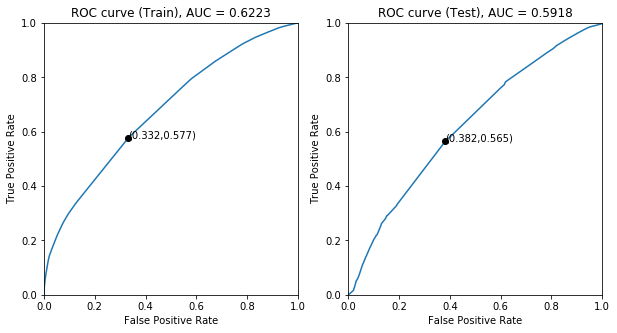

test TPR 0.5652600268035172
test FPR 0.3815717164315809
best Threshold 0.5317389280727509


In [0]:
y_train = np.array(y_train)
y_train_pred = np.array(y_train_pred)

y_test= np.array(y_test)
y_test_pred = np.array(y_test_pred)
ss=plot_ROC(y_train,y_train_pred,y_test,y_test_pred)

print("best Threshold",ss)


In [0]:
false_positives=np.logical_and(y_test!=y_predicted,y_predicted==1)
fp=X_test[false_positives]


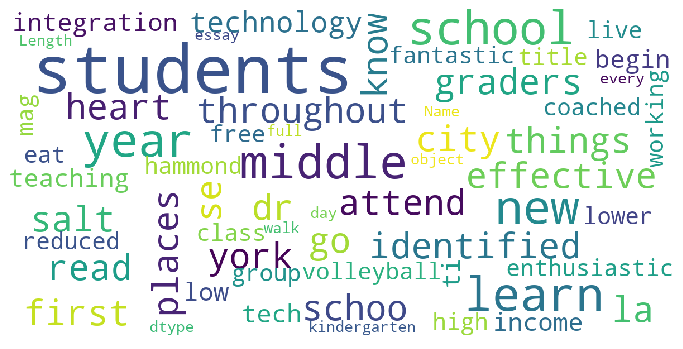

In [0]:
#source:https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(fp['essay'])


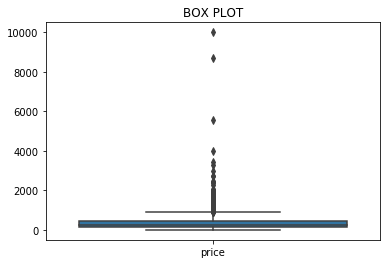

In [0]:
h=pd.DataFrame(fp['price'])

sns.boxplot(data=h)
plt.title("BOX PLOT")
plt.show()

<class 'scipy.sparse.csr.csr_matrix'>


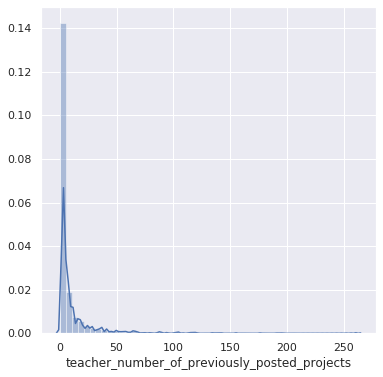

In [0]:
import seaborn as sns, numpy as np
sns.set(); 
plt.figure(figsize=(6,6))
ax = sns.distplot(fp['teacher_number_of_previously_posted_projects'])
print(type(X_tr_tfidf))

<h2>1.6 Getting top features using `feature_importances_`</h2>

In [0]:
# from sklearn.metrics import confusion_matrix

clf =DecisionTreeClassifier(random_state=0,class_weight="balanced")
clf.fit(X_tr_tfidf,y_train)
importances_train = clf.feature_importances_





    
    
 


In [0]:
importance_not_zero_train=[]
importance_not_zero_index_train=[]
imp_zero_train=[]
imp_zero_index_train=[]


for i in range(len(importances_train)):
  
  if importances_train[i]!=0:
    importance_not_zero_train.append(importances_train[i])
    importance_not_zero_index_train.append(i)
    
    
  else:
    imp_zero_train.append(i)
    imp_zero_index_train.append(i)


    



In [0]:

df_tr = pd.DataFrame(X_tr_tfidf.toarray())
df1_train = df_tr.drop([df_tr.columns[i] for i in imp_zero_index_train],axis=1)


df_cr = pd.DataFrame(X_cr_tfidf.toarray())
df1_cr = df_cr.drop([df_cr.columns[i] for i in imp_zero_index_train],axis=1)



df_te = pd.DataFrame(X_te_tfidf.toarray())
df1_te = df_te.drop([df_te.columns[i] for i in imp_zero_index_train],axis=1)

                      

In [0]:
print(len(importance_not_zero_train))
print(len( imp_zero_train))
print(df1_train.shape) 
print(df1_cr.shape)
print(df1_te.shape) 

1837
3264
(49041, 1837)
(24155, 1837)
(36052, 1837)


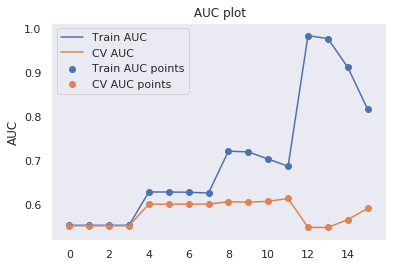

The parameters combination that would give best accuracy is : 
{'max_depth': 10, 'min_samples_split': 500}
The best accuracy achieved after parameter tuning via grid search is :  0.6132540298526432


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.461332,0.003661,0.015705,0.000407,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.554982,0.544362,0.553675,0.551006,0.004728,11,0.550052,0.554735,0.551553,0.552113,0.001952
1,0.459120,0.003012,0.015257,0.000089,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.554982,0.544362,0.553675,0.551006,0.004728,11,0.550052,0.554735,0.551553,0.552113,0.001952
2,0.457940,0.001640,0.015248,0.000026,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.554982,0.544362,0.553675,0.551006,0.004728,11,0.550052,0.554735,0.551553,0.552113,0.001952
3,0.462383,0.007271,0.015901,0.000862,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.554982,0.544362,0.553675,0.551006,0.004728,11,0.550052,0.554735,0.551553,0.552113,0.001952
4,2.122383,0.017143,0.016133,0.000162,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.605079,0.592926,0.603520,0.600508,0.005399,7,0.623595,0.635481,0.625421,0.628166,0.005226


In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import math


alpha =DecisionTreeClassifier(random_state=0,class_weight="balanced")
parameters = {'max_depth': [1, 5, 10, 50],'min_samples_split':[5,10,100,500]}
clf1 = GridSearchCV(alpha, parameters,cv=3, scoring='roc_auc',return_train_score=True)
best_alpha1=clf1.fit(df1_train, y_train)

results1_drop = pd.DataFrame.from_dict(clf1.cv_results_)
#print(results)
#results1 = results1.sort_values(['param_max_depth'])

train_auc_set2_drop= results1_drop['mean_train_score']
train_auc_std_set2_drop= results1_drop['std_train_score']
cv_auc_set2_drop = results1_drop['mean_test_score'] 
cv_auc_std_set2_drop= results1_drop['std_test_score']
#K2 =  results1['param_max_depth']
Y_drop=[] 
for i in range(16):
    Y_drop.append(i)

plt.plot(Y_drop,train_auc_set2_drop,label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(Y_drop, cv_auc_set2_drop, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(Y_drop, train_auc_set2_drop, label='Train AUC points')
plt.scatter(Y_drop, cv_auc_set2_drop, label='CV AUC points')


plt.legend()
#plt.xlabel("Max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title(" AUC plot")
plt.grid()
plt.show()

results1.head()
print('The parameters combination that would give best accuracy is : ')
print(clf1.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', clf1.best_score_)
results1.head()

HeatMap of train


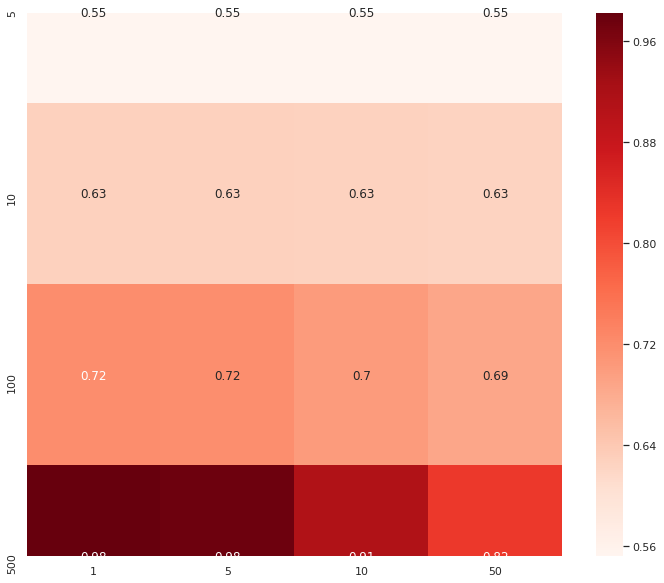

HeatMap of CV


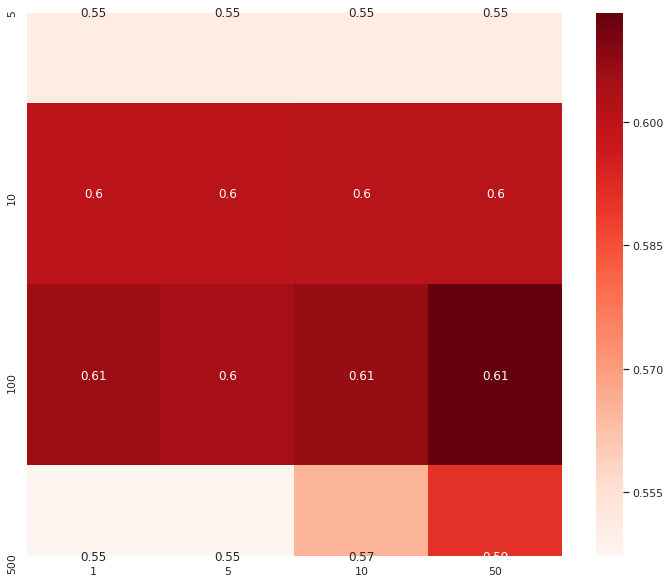

(36052,)


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,10))
print("HeatMap of train")
data_tr_drop={'1':[train_auc_set2_drop.iloc[0],train_auc_set2_drop.iloc[4],train_auc_set2_drop.iloc[8],train_auc_set2_drop.iloc[12]],'5':[train_auc_set2_drop.iloc[1],train_auc_set2_drop.iloc[5],train_auc_set2_drop.iloc[9],train_auc_set2_drop.iloc[13]],'10':[train_auc_set2_drop.iloc[2],train_auc_set2_drop.iloc[6],train_auc_set2.iloc[10],train_auc_set2_drop.iloc[14]],'50':[train_auc_set2_drop.iloc[3],train_auc_set2_drop.iloc[7],train_auc_set2_drop.iloc[11],train_auc_set2_drop.iloc[15]]}
df_tr_drop=pd.DataFrame(data_tr,index=[5,10,100,500])
sns.heatmap(df_tr_drop, annot=True, cmap=plt.cm.Reds)
plt.show()

plt.figure(figsize=(12,10))
print("HeatMap of CV")
data_test_drop={'1':[cv_auc_set2_drop.iloc[0],cv_auc_set2_drop.iloc[4],cv_auc_set2_drop.iloc[8],cv_auc_set2_drop.iloc[12]],'5':[cv_auc_set2_drop.iloc[1],cv_auc_set2_drop.iloc[5],cv_auc_set2_drop.iloc[9],cv_auc_set2_drop.iloc[13]],'10':[cv_auc_set2_drop.iloc[2],cv_auc_set2_drop.iloc[6],cv_auc_set2_drop.iloc[10],cv_auc_set2_drop.iloc[14]],'50':[cv_auc_set2_drop.iloc[3],cv_auc_set2_drop.iloc[7],cv_auc_set2_drop.iloc[11],cv_auc_set2_drop.iloc[15]]}
df_test_drop=pd.DataFrame(data_test_drop,index=[5,10,100,500])

sns.heatmap(df_test_drop, annot=True, cmap=plt.cm.Reds)
plt.show()
print(y_test.shape)

ROC without best threshold

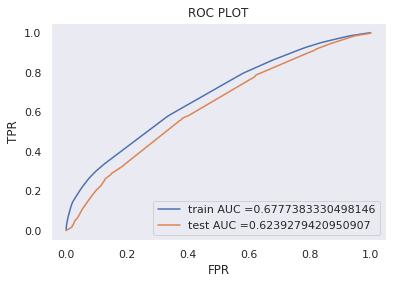

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

#best_alpha=best_alpha.best_estimator_.get_params()['alpha']
clf =DecisionTreeClassifier( max_depth=10,min_samples_split=500,class_weight="balanced")
clf.fit(df1_train,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs


y_train_pred_drop=(clf.predict_proba(df1_train)[:,1])
y_test_pred_drop=(clf.predict_proba(df1_te)[:,1])

train_fpr_drop, train_tpr_drop, tr_thresholds_drop = roc_curve(y_train, y_train_pred_drop)
test_fpr_drop, test_tpr_drop, te_thresholds_drop = roc_curve(y_test, y_test_pred_drop)

plt.plot(train_fpr_drop, train_tpr_drop, label="train AUC ="+str(auc(train_fpr_drop, train_tpr_drop)))
plt.plot(test_fpr_drop, test_tpr_drop, label="test AUC ="+str(auc(test_fpr_drop, test_tpr_drop)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
plt.grid()
plt.show()

Confusion matrix without best threshold

In [0]:
from sklearn.metrics import confusion_matrix
clf =DecisionTreeClassifier( max_depth=10,min_samples_split=500,class_weight="balanced")
clf.fit(df1_train,y_train)
 
y_predicted_drop = clf.predict(df1_te)
cm = confusion_matrix(y_test, y_predicted_drop)
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted_drop).ravel()
test_TPR=tp/(fn+tp)
test_FPR=fp/(tn+fp)
print("test TPR",test_TPR)
print("test FPR",test_FPR)

[[ 3374  2085]
 [13249 17344]]
test TPR 0.5669270748210375
test FPR 0.38193808389814987


ROC with best Threshold

In [0]:
#source:https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print ('Train Accuracy:',acc_train)
    print ('Train AUC:', auc_train)
    print ('Train Confusion Matrix:')
    print (cm_train)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    #curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print ('Test Accuracy:',acc_test)
    print ('Test AUC:', auc_test)
    print ('Test Confusion Matrix:')
    print (cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])
    tn, fp, fn, tp = cm_test.ravel()
    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    #curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    
    plt.show()
    test_TPR=tp/(fn+tp)
    test_FPR=fp/(tn+fp)
    print("test TPR",test_TPR)
    print("test FPR",test_FPR)
    return best_threshold

Train Accuracy: 0.5895883036642809
Train AUC: 0.6223197950484186
Train Confusion Matrix:
[[ 4970  2456]
 [17671 23944]]
Test Accuracy: 0.573310773327416
Test AUC: 0.5918441551859681
Test Confusion Matrix:
[[ 3376  2083]
 [13300 17293]]


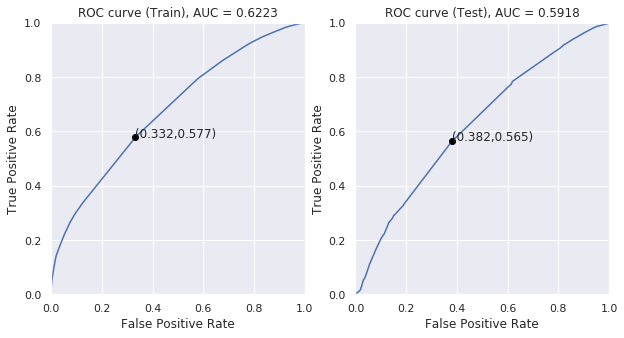

test TPR 0.5652600268035172
test FPR 0.3815717164315809
best Threshold 0.5317389280727509


In [0]:
y_train = np.array(y_train)
y_train_pred = np.array(y_train_pred)

y_test= np.array(y_test)
y_test_pred = np.array(y_test_pred)
ss=plot_ROC(y_train,y_train_pred,y_test,y_test_pred)

print("best Threshold",ss)


In [0]:
false_positives_drop=np.logical_and(y_test!=y_predicted_drop,y_predicted_drop==1)
fp_drop=X_test[false_positives_drop]


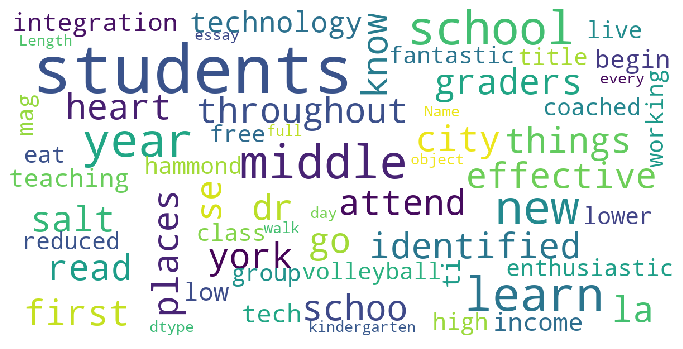

In [0]:
#source:https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(fp_drop['essay'])


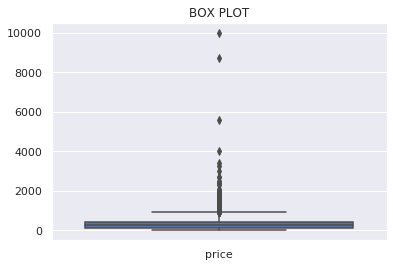

In [0]:
h=pd.DataFrame(fp_drop['price'])

sns.boxplot(data=h)
plt.title("BOX PLOT")
plt.show()

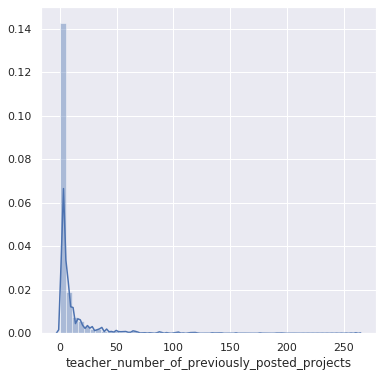

In [0]:
import seaborn as sns, numpy as np
sns.set(); 
plt.figure(figsize=(6,6))
ax = sns.distplot(fp_drop['teacher_number_of_previously_posted_projects'])


<h2>SET 2</h2>


In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=17UdaINmxF7AIju_Z947-eLbMSk7LQH55'
fluff, id = link.split('=')
print (id)


17UdaINmxF7AIju_Z947-eLbMSk7LQH55


In [0]:
link1='https://drive.google.com/open?id=154kF75bCeNRu-sns7CJerlfwxew5isyd'
fluff, id1 = link1.split('=')
print (id1)

154kF75bCeNRu-sns7CJerlfwxew5isyd


In [0]:
import pandas
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('preprocessed_data.csv') 
downloaded1 = drive.CreateFile({'id':id1}) 
downloaded1.GetContentFile('glove_vectors') 
data = pandas.read_csv('preprocessed_data.csv')
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:

y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)



In [0]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_train = TfidfVectorizer()
tfidf_model_train.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_train = dict(zip(tfidf_model_train.get_feature_names(), list(tfidf_model_train.idf_)))
tfidf_words_train = set(tfidf_model_train.get_feature_names())



tfidf_model_cv = TfidfVectorizer()
tfidf_model_cv.fit(X_cv['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_cv = dict(zip(tfidf_model_cv.get_feature_names(), list(tfidf_model_cv.idf_)))
tfidf_words_cv = set(tfidf_model_cv.get_feature_names())





tfidf_model_test = TfidfVectorizer()
tfidf_model_test.fit(X_test['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_test = dict(zip(tfidf_model_test.get_feature_names(), list(tfidf_model_test.idf_)))
tfidf_words_test = set(tfidf_model_test.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight_train =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_train):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf_train = dictionary_train[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf_train) # calculating tfidf weighted w2v
            tf_idf_weight_train += tf_idf_train
    if tf_idf_weight_train != 0:
        vector /= tf_idf_weight_train
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))



tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight_cv =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_cv):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf_cv = dictionary_cv[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf_cv) # calculating tfidf weighted w2v
            tf_idf_weight_cv += tf_idf_cv
    if tf_idf_weight_cv != 0:
        vector /= tf_idf_weight_cv
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))




tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight_test =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_test):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf_test = dictionary_test[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf_test) # calculating tfidf weighted w2v
            tf_idf_weight_test += tf_idf_test
    if tf_idf_weight_test != 0:
        vector /= tf_idf_weight_test
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))




  0%|          | 71/24155 [00:00<00:34, 699.44it/s]

49041
300


  0%|          | 66/36052 [00:00<00:55, 654.05it/s]

24155
300


100%|██████████| 36052/36052 [00:57<00:00, 627.73it/s]

36052
300


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
v=np.array(X_train_number_norm)
o=np.array(X_train_price_norm)
X_tr_tfidf_w2v = hstack((tfidf_w2v_vectors_train, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_cat_ohe,X_train_clean_cat_sub_ohe,v,o)).tocsr()
v=np.array(X_cv_number_norm)
o=np.array(X_cv_price_norm)
X_cr_tfidf_w2v = hstack((tfidf_w2v_vectors_cv, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_clean_cat_ohe,X_cv_clean_cat_sub_ohe,v,o)).tocsr()
v=np.array(X_test_number_norm)
o=np.array(X_test_price_norm)
X_te_tfidf_w2v = hstack((tfidf_w2v_vectors_test, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_cat_ohe,X_test_clean_cat_sub_ohe,v,o)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf_w2v.shape, y_train.shape)
print(X_cr_tfidf_w2v.shape, y_cv.shape)
print(X_te_tfidf_w2v.shape, y_test.shape)
print("="*100)


Final Data matrix
(49041, 401) (49041,)
(24155, 401) (24155,)
(36052, 401) (36052,)


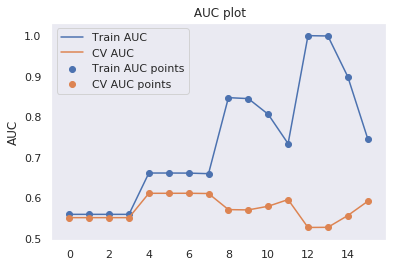

The parameters combination that would give best accuracy is : 
{'max_depth': 5, 'min_samples_split': 100}
The best accuracy achieved after parameter tuning via grid search is :  0.6119021279669309


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.442719,0.000747,0.030982,0.000189,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.546612,0.555999,0.553010,0.551873,0.003916,11,0.562703,0.556283,0.560986,0.55999,0.002714
1,1.440506,0.008324,0.030830,0.000113,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.546612,0.555999,0.553010,0.551873,0.003916,11,0.562703,0.556283,0.560986,0.55999,0.002714
2,1.436246,0.003872,0.030449,0.000129,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.546612,0.555999,0.553010,0.551873,0.003916,11,0.562703,0.556283,0.560986,0.55999,0.002714
3,1.439820,0.003480,0.030934,0.000516,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.546612,0.555999,0.553010,0.551873,0.003916,11,0.562703,0.556283,0.560986,0.55999,0.002714
4,7.105620,0.052399,0.031812,0.000652,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.605200,0.616283,0.613945,0.611809,0.004770,2,0.668501,0.655839,0.660820,0.66172,0.005208


In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import math


alpha =DecisionTreeClassifier(random_state=0,class_weight="balanced")
parameters = {'max_depth': [1, 5, 10, 50],'min_samples_split':[5,10,100,500]}
clf1 = GridSearchCV(alpha, parameters,cv=3, scoring='roc_auc',return_train_score=True)
best_alpha1=clf1.fit(X_tr_tfidf_w2v, y_train)

results1 = pd.DataFrame.from_dict(clf1.cv_results_)
#print(results)
#results1 = results1.sort_values(['param_max_depth'])

train_auc_set2= results1['mean_train_score']
train_auc_std_set2= results1['std_train_score']
cv_auc_set2 = results1['mean_test_score'] 
cv_auc_std_set2= results1['std_test_score']
#K2 =  results1['param_max_depth']
Y=[] 
for i in range(16):
    Y.append(i)

plt.plot(Y,train_auc_set2,label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(Y, cv_auc_set2, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(Y, train_auc_set2, label='Train AUC points')
plt.scatter(Y, cv_auc_set2, label='CV AUC points')


plt.legend()
#plt.xlabel("Max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title(" AUC plot")
plt.grid()
plt.show()

results1.head()
print('The parameters combination that would give best accuracy is : ')
print(clf1.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', clf1.best_score_)
results1.head()

HeatMap of train


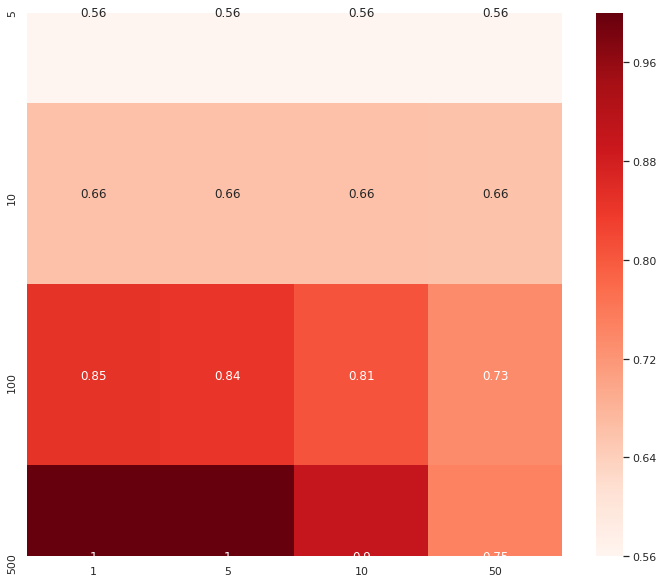

HeatMap of CV


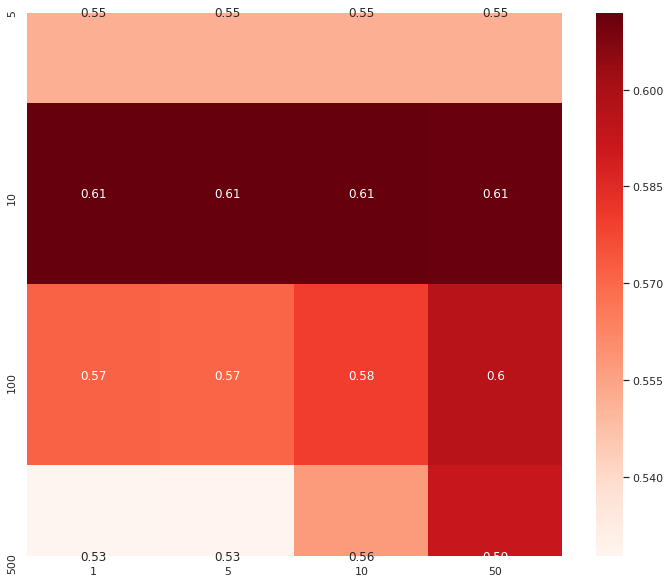

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,10))
print("HeatMap of train")
data_tr={'1':[train_auc_set2.iloc[0],train_auc_set2.iloc[4],train_auc_set2.iloc[8],train_auc_set2.iloc[12]],'5':[train_auc_set2.iloc[1],train_auc_set2.iloc[5],train_auc_set2.iloc[9],train_auc_set2.iloc[13]],'10':[train_auc_set2.iloc[2],train_auc_set2.iloc[6],train_auc_set2.iloc[10],train_auc_set2.iloc[14]],'50':[train_auc_set2.iloc[3],train_auc_set2.iloc[7],train_auc_set2.iloc[11],train_auc_set2.iloc[15]]}
df_tr=pd.DataFrame(data_tr,index=[5,10,100,500])
sns.heatmap(df_tr, annot=True, cmap=plt.cm.Reds)
plt.show()

plt.figure(figsize=(12,10))
print("HeatMap of CV")
data_test={'1':[cv_auc_set2.iloc[0],cv_auc_set2.iloc[4],cv_auc_set2.iloc[8],cv_auc_set2.iloc[12]],'5':[cv_auc_set2.iloc[1],cv_auc_set2.iloc[5],cv_auc_set2.iloc[9],cv_auc_set2.iloc[13]],'10':[cv_auc_set2.iloc[2],cv_auc_set2.iloc[6],cv_auc_set2.iloc[10],cv_auc_set2.iloc[14]],'50':[cv_auc_set2.iloc[3],cv_auc_set2.iloc[7],cv_auc_set2.iloc[11],cv_auc_set2.iloc[15]]}
df_test=pd.DataFrame(data_test,index=[5,10,100,500])

sns.heatmap(df_test, annot=True, cmap=plt.cm.Reds)
plt.show()

ROC without calcolating best threshold

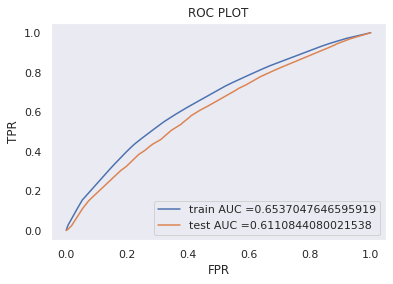

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

#best_alpha=best_alpha.best_estimator_.get_params()['alpha']
clf =DecisionTreeClassifier( max_depth=5,min_samples_split=100,class_weight="balanced")
clf.fit(X_tr_tfidf_w2v,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs


y_train_pred=(clf.predict_proba(X_tr_tfidf_w2v)[:,1])
y_test_pred=(clf.predict_proba(X_te_tfidf_w2v)[:,1])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
plt.grid()
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
clf =DecisionTreeClassifier( max_depth=10,min_samples_split=500,class_weight="balanced")
clf.fit(X_tr_tfidf_w2v,y_train)
 
y_predicted = clf.predict(X_te_tfidf_w2v)
cm = confusion_matrix(y_test, y_predicted)
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
test_TPR=tp/(fn+tp)
test_FPR=fp/(tn+fp)
print("test TPR",test_TPR)
print("test FPR",test_FPR)


[[ 3048  2411]
 [12491 18102]]
test TPR 0.591703984571634
test FPR 0.44165598094889175


In [0]:
#source:https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print ('Train Accuracy:',acc_train)
    print ('Train AUC:', auc_train)
    print ('Train Confusion Matrix:')
    print (cm_train)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    #curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print ('Test Accuracy:',acc_test)
    print ('Test AUC:', auc_test)
    print ('Test Confusion Matrix:')
    print (cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])
    tn, fp, fn, tp = cm_test.ravel()
    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    #curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    
    plt.show()
    test_TPR=tp/(fn+tp)
    test_FPR=fp/(tn+fp)
    print("test TPR",test_TPR)
    print("test FPR",test_FPR)
    return best_threshold

Train Accuracy: 0.568055300666789
Train AUC: 0.6143892469215019
Train Confusion Matrix:
[[ 5056  2370]
 [18813 22802]]
Test Accuracy: 0.5506768001775214
Test AUC: 0.580012736218352
Test Confusion Matrix:
[[ 3396  2063]
 [14136 16457]]


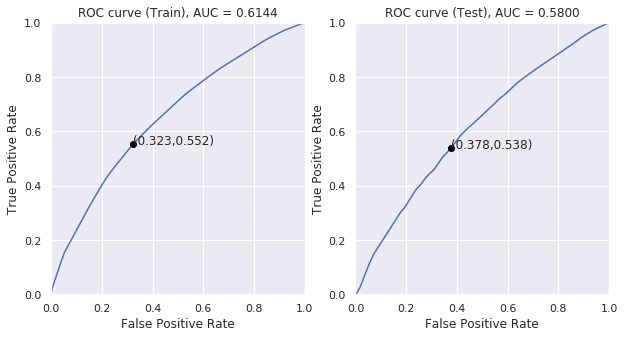

test TPR 0.5379335142025954
test FPR 0.3779080417658912
best Threshold 0.5042481106271862


In [0]:
y_train = np.array(y_train)
y_train_pred = np.array(y_train_pred)

y_test= np.array(y_test)
y_test_pred = np.array(y_test_pred)
ss=plot_ROC(y_train,y_train_pred,y_test,y_test_pred)

print("best Threshold",ss)


In [0]:
false_positives=np.logical_and(y_test!=y_predicted,y_predicted==1)
fp_w2v=X_test[false_positives]


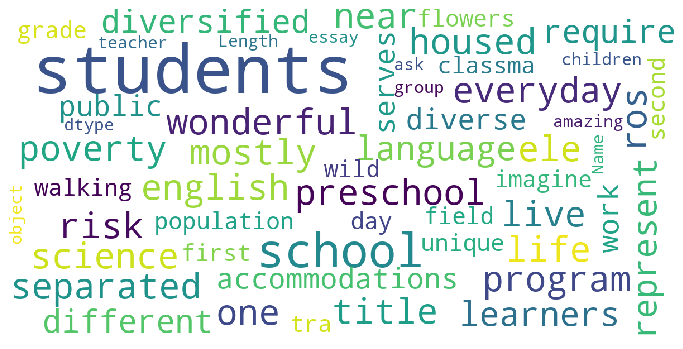

In [0]:
#source:https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(fp_w2v['essay'])


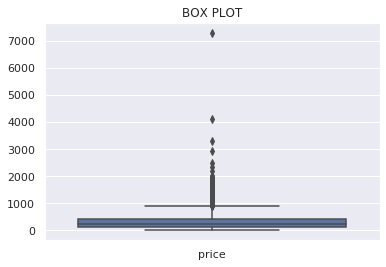

In [0]:
h=pd.DataFrame(fp_w2v['price'])

sns.boxplot(data=h)
plt.title("BOX PLOT")
plt.show()

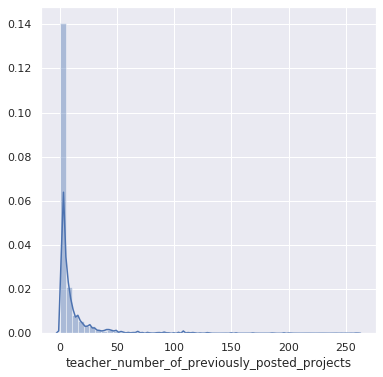

In [0]:
import seaborn as sns, numpy as np
sns.set(); 
plt.figure(figsize=(6,6))
ax = sns.distplot(fp_w2v['teacher_number_of_previously_posted_projects'])


|vectorizer|Model|Hyperparameter-max_depth|Hyperparameter-min_samples_split|AUC
|---|---|---|---|---|
|TFIDF|Decision Tree|10|500|0.6128
|TFIDF-Dropping zero feature Important features|Decision Tree|10|500|0.6132 
|TFIDF-W2V|Decision Tree|5|100|0.611
